# PRCL-0012- ITSM

## Table of Contents

##### 1.Importing Necessary Libraries
##### 2.Load Datasets
##### 3.Exploratory Data Analysis
##### 4.Data Preprocessing
##### 5.Feature Selection
##### 6.Model Implementation
##### 7.Model Evaluation
##### 8.Model Comparison Report
##### 9.Challenges Faced Report
##### 10.Conclusion

## Business Case

### ABC Tech, a mid-sized IT-enabled organization, has been using the ITIL framework for incident management, but recent customer surveys show poor performance in this area. 
### The company seeks to enhance its incident management process using machine learning. 
### Four key areas for improvement include predicting high-priority tickets, forecasting incident volumes, automating ticket tagging, and predicting RFC failures or misconfigurations. 
### These initiatives aim to streamline operations, reduce delays, and optimize resource planning for better overall service management and customer satisfaction.

### Approach to Improve ITSM Process with Machine Learning

- **Exploratory Data Analysis (EDA):**  
  Analyze the historical incident ticket data to uncover patterns, trends, and anomalies related to ticket priorities, volumes, and response times. Use statistical methods and visualizations to understand the distribution of incidents across different fields, departments, and timeframes, focusing on seasonal and temporal variations.

- **Data Preparation:**  
  Clean and preprocess the incident ticket data to ensure compatibility with machine learning models. This involves handling missing values, encoding categorical variables (such as ticket priority and department), and structuring the data for use in predictive models.

- **Model Building:**  
  Develop machine learning models for key tasks:
  1. Predicting high-priority incidents (priority 1 & 2).
  2. Forecasting incident volumes for different fields on a quarterly and annual basis.
  3. Automating ticket tagging to assign correct priorities and departments.
  4. Predicting RFC (Request for Change) failures or misconfigurations in ITSM assets.

- **Model Selection and Training:**  
  Train multiple machine learning models, including classification algorithms (e.g., Random Forest, XGBoost) for high-priority ticket prediction and regression models (e.g., Linear Regression, ARIMA) for forecasting incident volumes. For automation of ticket tagging and RFC predictions, explore both supervised and unsupervised techniques.

- **Hyperparameter Optimization:**  
  Fine-tune model parameters (e.g., learning rate, number of trees/estimators, regularization terms) to optimize performance. Implement techniques like Grid Search or Random Search to identify the best model configurations.

- **Performance Evaluation:**  
  Evaluate model accuracy using metrics such as F1 Score, Accuracy, Precision, Recall, and the ROC-AUC Curve for classification tasks. For forecasting, assess model performance with Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared values to ensure accurate predictions.

- **Model Interpretation:**  
  Analyze the best-performing models to provide actionable insights, such as identifying key features influencing high-priority ticket prediction and uncovering seasonal or trend-based patterns that could guide resource planning and automation strategies.

This approach aims to enhance the incident management process at ABC Tech by leveraging machine learning for smarter predictions, better resource allocation, and improved customer satisfaction.


## Importing Necessary Libraries

In [8]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Getting data

## Loading Data

In [11]:
df = pd.read_csv("client_data.csv")

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


## Domain Analysis

#### Feature Information

- **Incident_ID**  
  A unique identifier assigned to each incident ticket, ensuring distinct tracking and management.

- **Status**  
  The current state of the incident, such as 'Open', 'In Progress', 'Resolved', or 'Closed', indicating its lifecycle stage.

- **Impact**  
  The severity level of the incident's effect on services, typically categorized as 'High', 'Medium', or 'Low'.

- **Urgency**  
  The criticality of addressing the incident, often classified as 'High', 'Medium', or 'Low', reflecting how quickly it needs resolution.

- **Priority**  
  A numerical value representing the incident's priority, calculated based on its impact and urgency. Some entries may have missing values.

- **Category**  
  The primary classification of the incident, such as 'Software', 'Hardware', or 'Network', indicating the general area affected.

- **Subcategory**  
  A more specific classification within the main category, providing further detail about the incident's nature.

- **Assignment_Group**  
  The support team or department assigned to handle the incident, facilitating appropriate resource allocation.

- **Assigned_To**  
  The individual responsible for resolving the incident, ensuring accountability and clear ownership.

- **Opened_By**  
  The user or system that reported the incident, aiding in understanding the source and context.

- **Opened_At**  
  The date and time when the incident was initially reported, providing a timeline for response and resolution.

- **Resolved_At**  
  The date and time when the incident was resolved, marking the end of its active lifecycle.

- **Closed_At**  
  The date and time when the incident was officially closed, indicating the completion of all necessary actions.

- **Reopen_Count**  
  The number of times the incident has been reopened after closure, highlighting potential recurring issues.

- **SLA_Breach**  
  Indicates whether the incident resolution exceeded the predefined Service Level Agreement (SLA) time, affecting performance metrics.

- **Knowledge_Base_Used**  
  Indicates whether a knowledge base article was utilized during the incident resolution process, reflecting the use of existing resources.

- **Problem_ID**  
  Links the incident to a specific problem record, facilitating root cause analysis and trend identification.

- **Change_Request_ID**  
  Associates the incident with a change request, indicating that a change was implemented to resolve the issue.

- **Vendor**  
  The external service provider or vendor involved in resolving the incident, if applicable.

- **Location**  
  The physical or virtual location where the incident occurred, aiding in contextual analysis.

- **Contact_Type**  
  The method through which the incident was reported, such as 'Email', 'Phone', or 'Self-Service Portal'.

- **Caller_ID**  
  The identifier of the user who reported the incident, useful for communication and follow-up.

- **Closed_Code**  
  The code representing the reason for closing the incident, such as 'Resolved', 'Duplicate', or 'Not Reproducible'.

- **Reopen_Code**  
  The code indicating the reason for reopening a closed incident, if applicable.

- **Incident_Type**  
  The classification of the incident, such as 'Service Request', 'Incident', or 'Problem', providing context to the nature of the issue.

- **CI_Name**  
  The name of the Configuration Item (CI) affected by the incident, linking the issue to specific assets.

- **CI_Cat**  
  The category of the Configuration Item (CI), such as 'Hardware', 'Software', or 'Network', indicating the type of asset involved.

- **CI_Subcat**  
  The subcategory of the Configuration Item (CI), providing more detailed classification within the main category.

- **WBS**  
  The Work Breakdown Structure (WBS) code associated with the incident, useful for project management and tracking.

- **Alert_Status**  
  The status of any alerts related to the incident, such as 'Triggered', 'Acknowledged', or 'Resolved'.

- **No_of_Reassignments**  
  The number of times the incident has been reassigned to different teams or individuals, indicating the complexity or ambiguity of the issue.

- **Handle_Time_hrs**  
  The total time taken to handle the incident, measured in hours, reflecting the efficiency of the resolution process.

- **Closure_Code**  
  The code representing the reason for closing the incident, such as 'Resolved', 'Duplicate', or 'Not Reproducible'.

- **No_of_Related_Interactions**  
  The number of interactions related to the incident, such as emails or phone calls, indicating the level of communication involved.

- **Related_Interaction**  
  Details about the related interactions, possibly links to related tickets or discussions.

- **No_of_Related_Incidents**  
  The number of incidents related to this incident, indicating potential recurring issues.

- **No_of_Related_Changes**  
  The number of changes related to this incident, indicating that changes were implemented to resolve the issue.


In [16]:
df.shape

(46606, 25)

In [17]:
df.size

1165150

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [19]:
df.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

### Insights

- This dataset contains **46606 records**, **25 feature columns** and **1 target column**.
- The dataset have a total of **1165150 entries** and **with null values**.

## Exploratory Data Analysis

In [23]:
df.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [24]:
df.isnull().sum()[df.isnull().sum()>0]

CI_Cat                          111
CI_Subcat                       111
Priority                       1380
No_of_Reassignments               1
Reopen_Time                   44322
Resolved_Time                  1780
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [25]:
for i in df.columns:
    print(i,"----",len(df[i].value_counts())) 

CI_Name ---- 3019
CI_Cat ---- 12
CI_Subcat ---- 64
WBS ---- 274
Incident_ID ---- 46606
Status ---- 2
Impact ---- 6
Urgency ---- 11
Priority ---- 5
number_cnt ---- 46606
Category ---- 4
KB_number ---- 1825
Alert_Status ---- 1
No_of_Reassignments ---- 41
Open_Time ---- 34636
Reopen_Time ---- 2244
Resolved_Time ---- 33627
Close_Time ---- 34528
Handle_Time_hrs ---- 30638
Closure_Code ---- 14
No_of_Related_Interactions ---- 49
Related_Interaction ---- 43060
No_of_Related_Incidents ---- 24
No_of_Related_Changes ---- 4
Related_Change ---- 232


In [26]:
cat_data_1=df[['CI_Cat','CI_Subcat','Impact','Urgency','Category','Status','Closure_Code']]

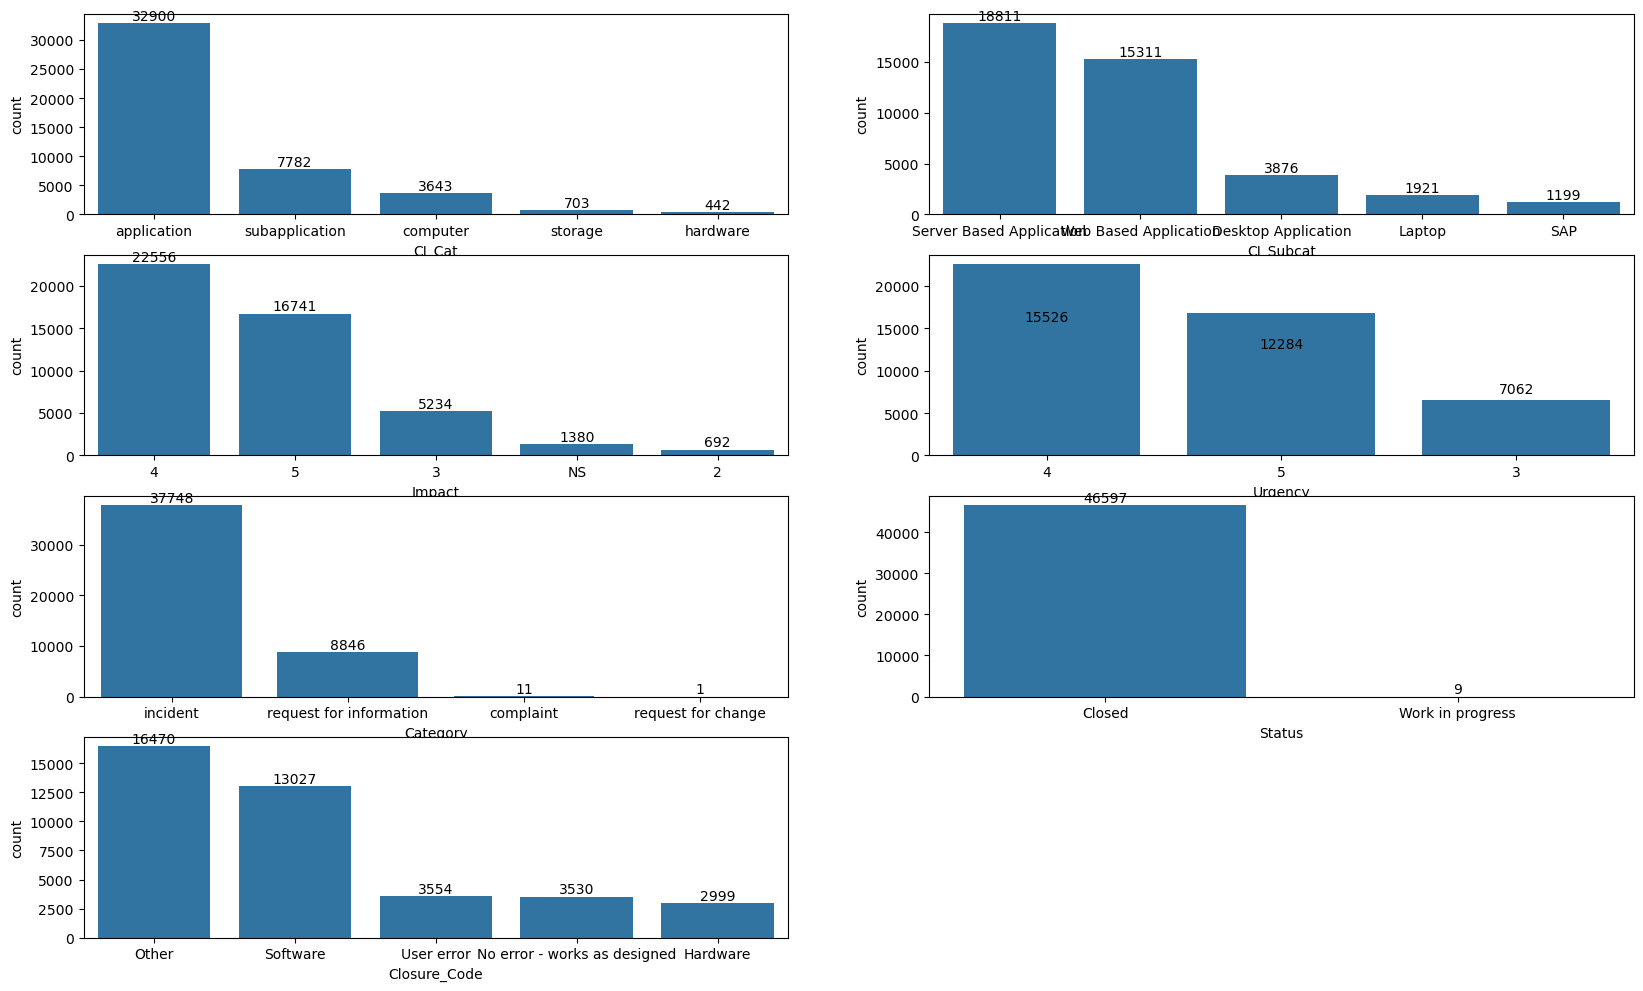

In [27]:
plt.figure(figsize=(20,12))
plotnumber=1
for i in cat_data_1:
  top_categories = df[i].value_counts().head(5)
  ax = plt.subplot(4,2,plotnumber)
  sns.countplot(data=df, x=i, order=top_categories.index, ax=ax)
  labels = ax.get_xticklabels()
  ax.set_xticklabels(labels)
  for j, count in enumerate(top_categories):
    ax.annotate(str(count), xy=(j, count), ha='center', va='bottom')
  plotnumber+=1
plt.show()

In [28]:
cols = [ 'CI_Cat', 'CI_Subcat',  'Status',
       'Impact',  'Priority', 'number_cnt', 'Category', 
       'Alert_Status', 'No_of_Reassignments', 'Closure_Code',
       'No_of_Related_Interactions', 
       'No_of_Related_Incidents', 'No_of_Related_Changes']

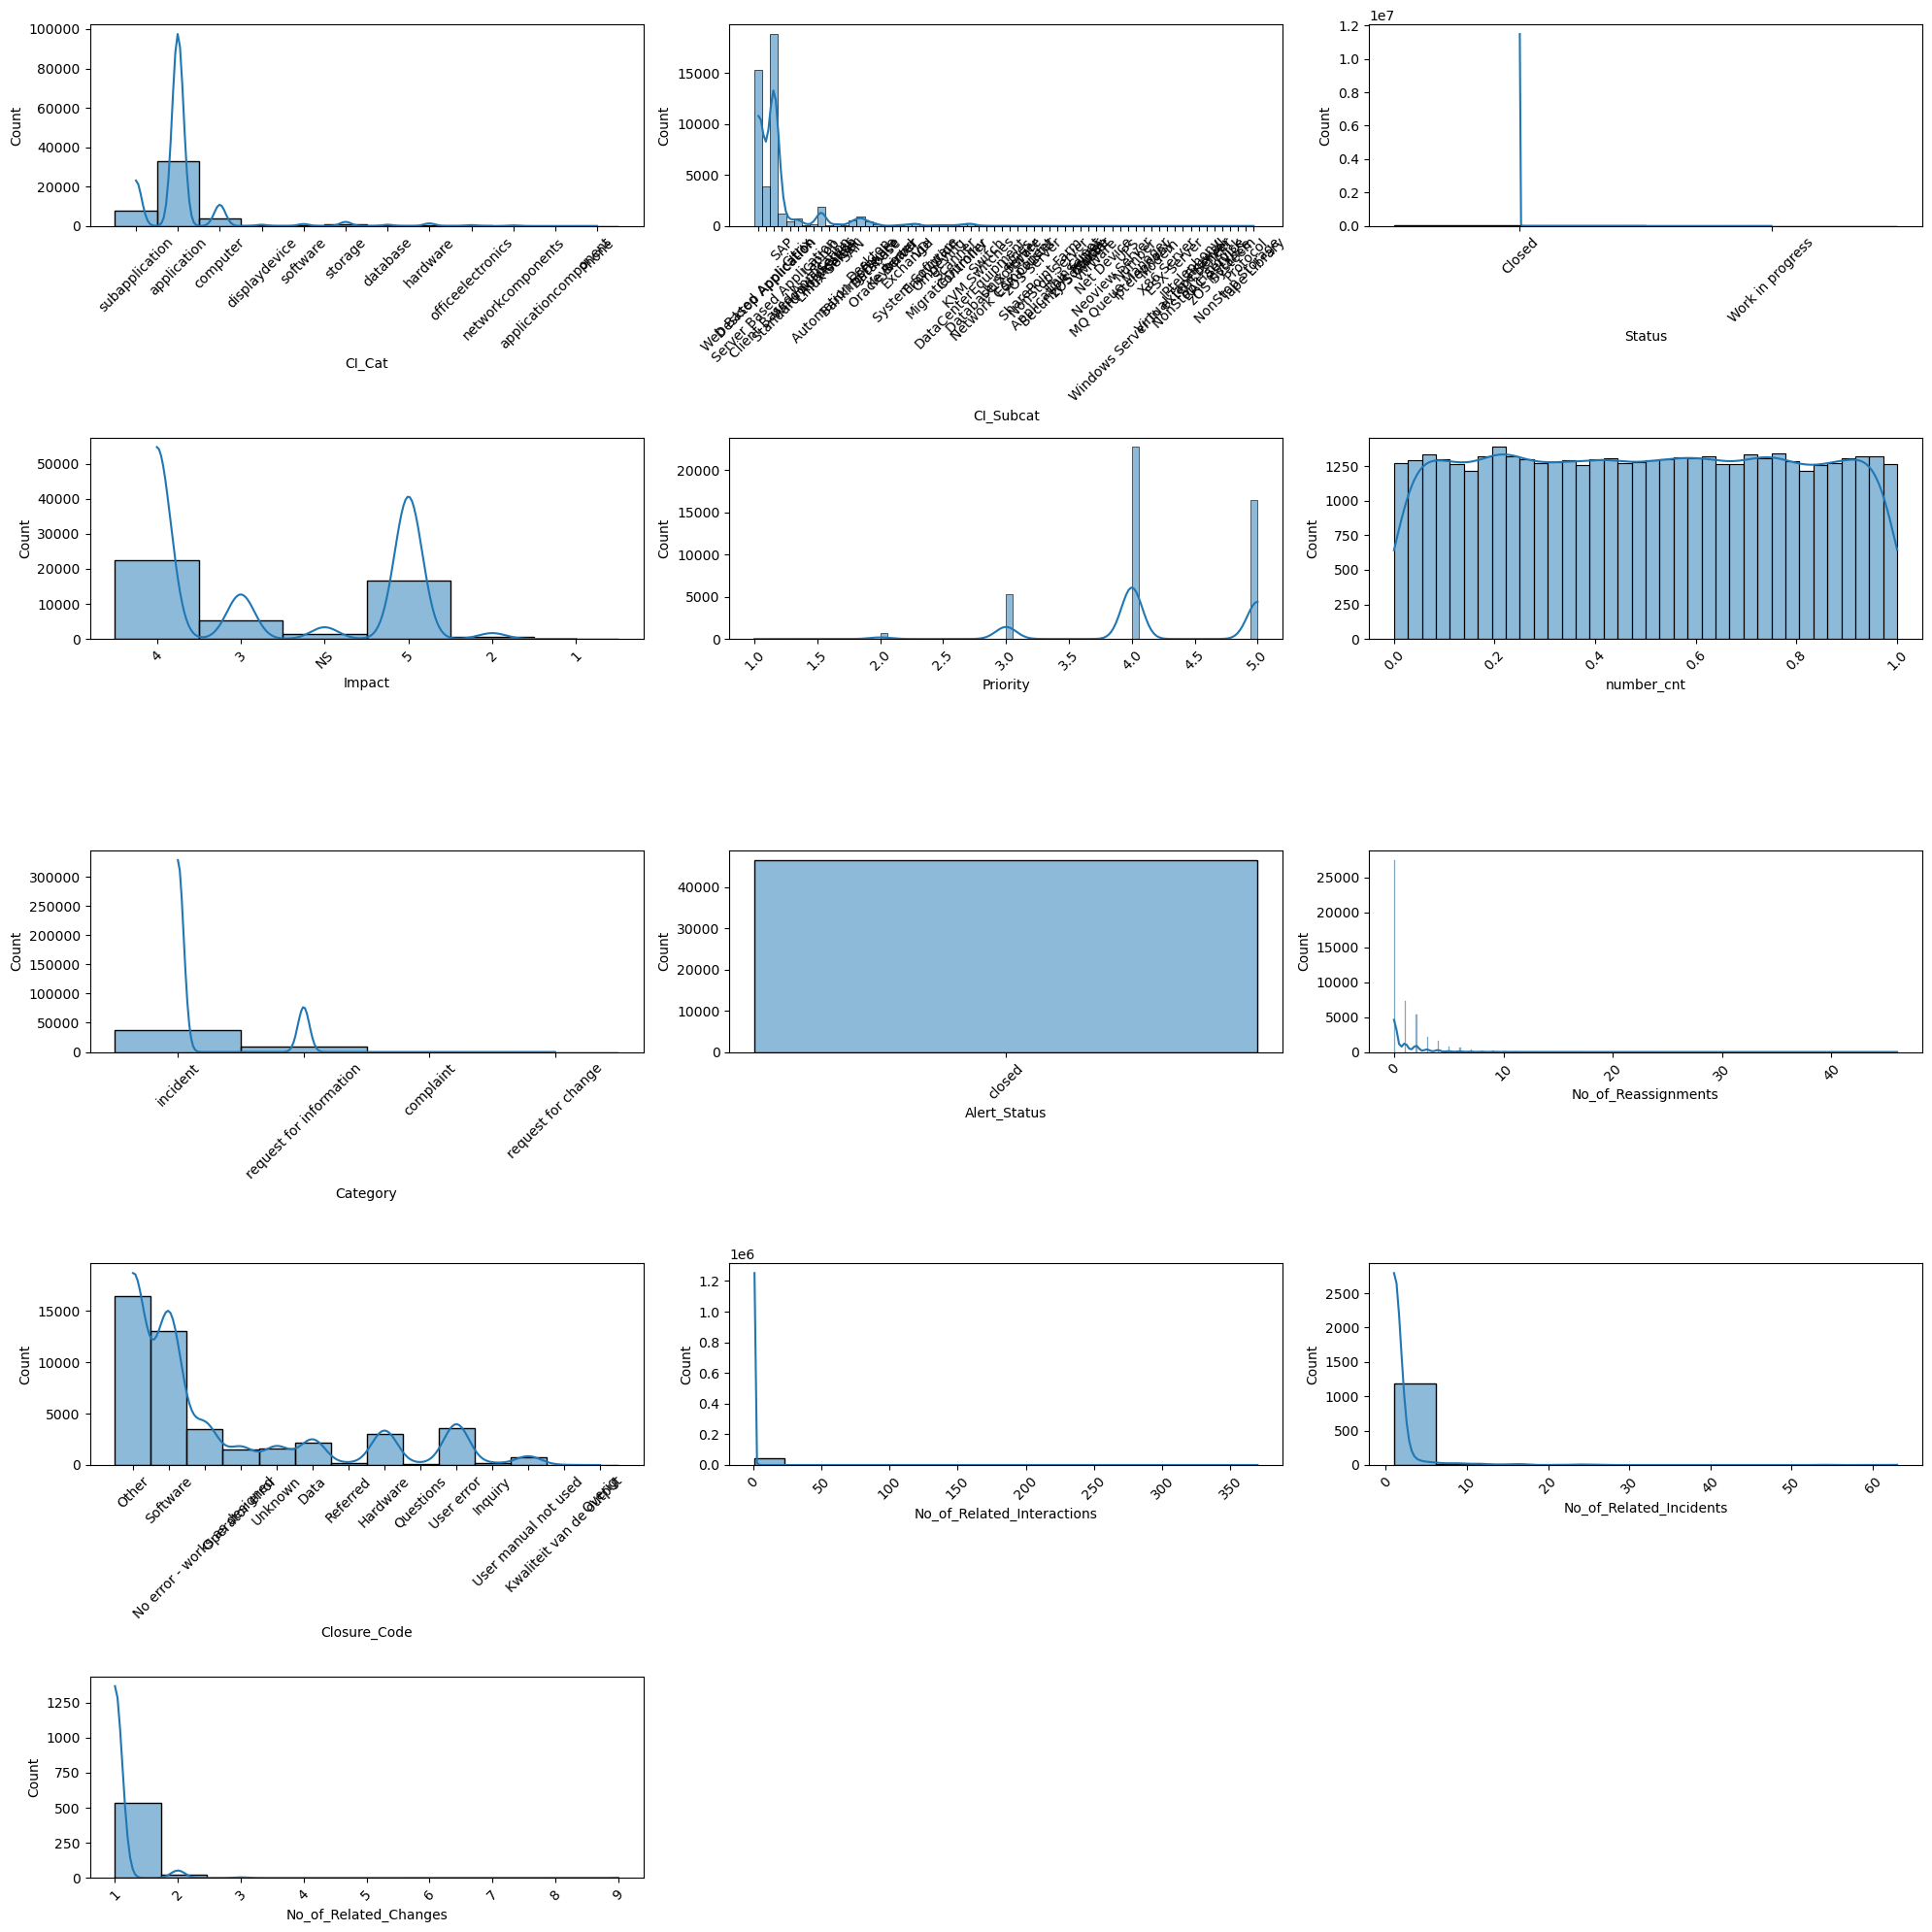

In [29]:
plt.figure(figsize=(20,20))
w = 1
for i in cols:
    plt.subplot(5,3,w)
    sns.histplot(x = i, data = df , kde = True)
    plt.xticks(rotation = 45)
    w = w+1
plt.tight_layout()

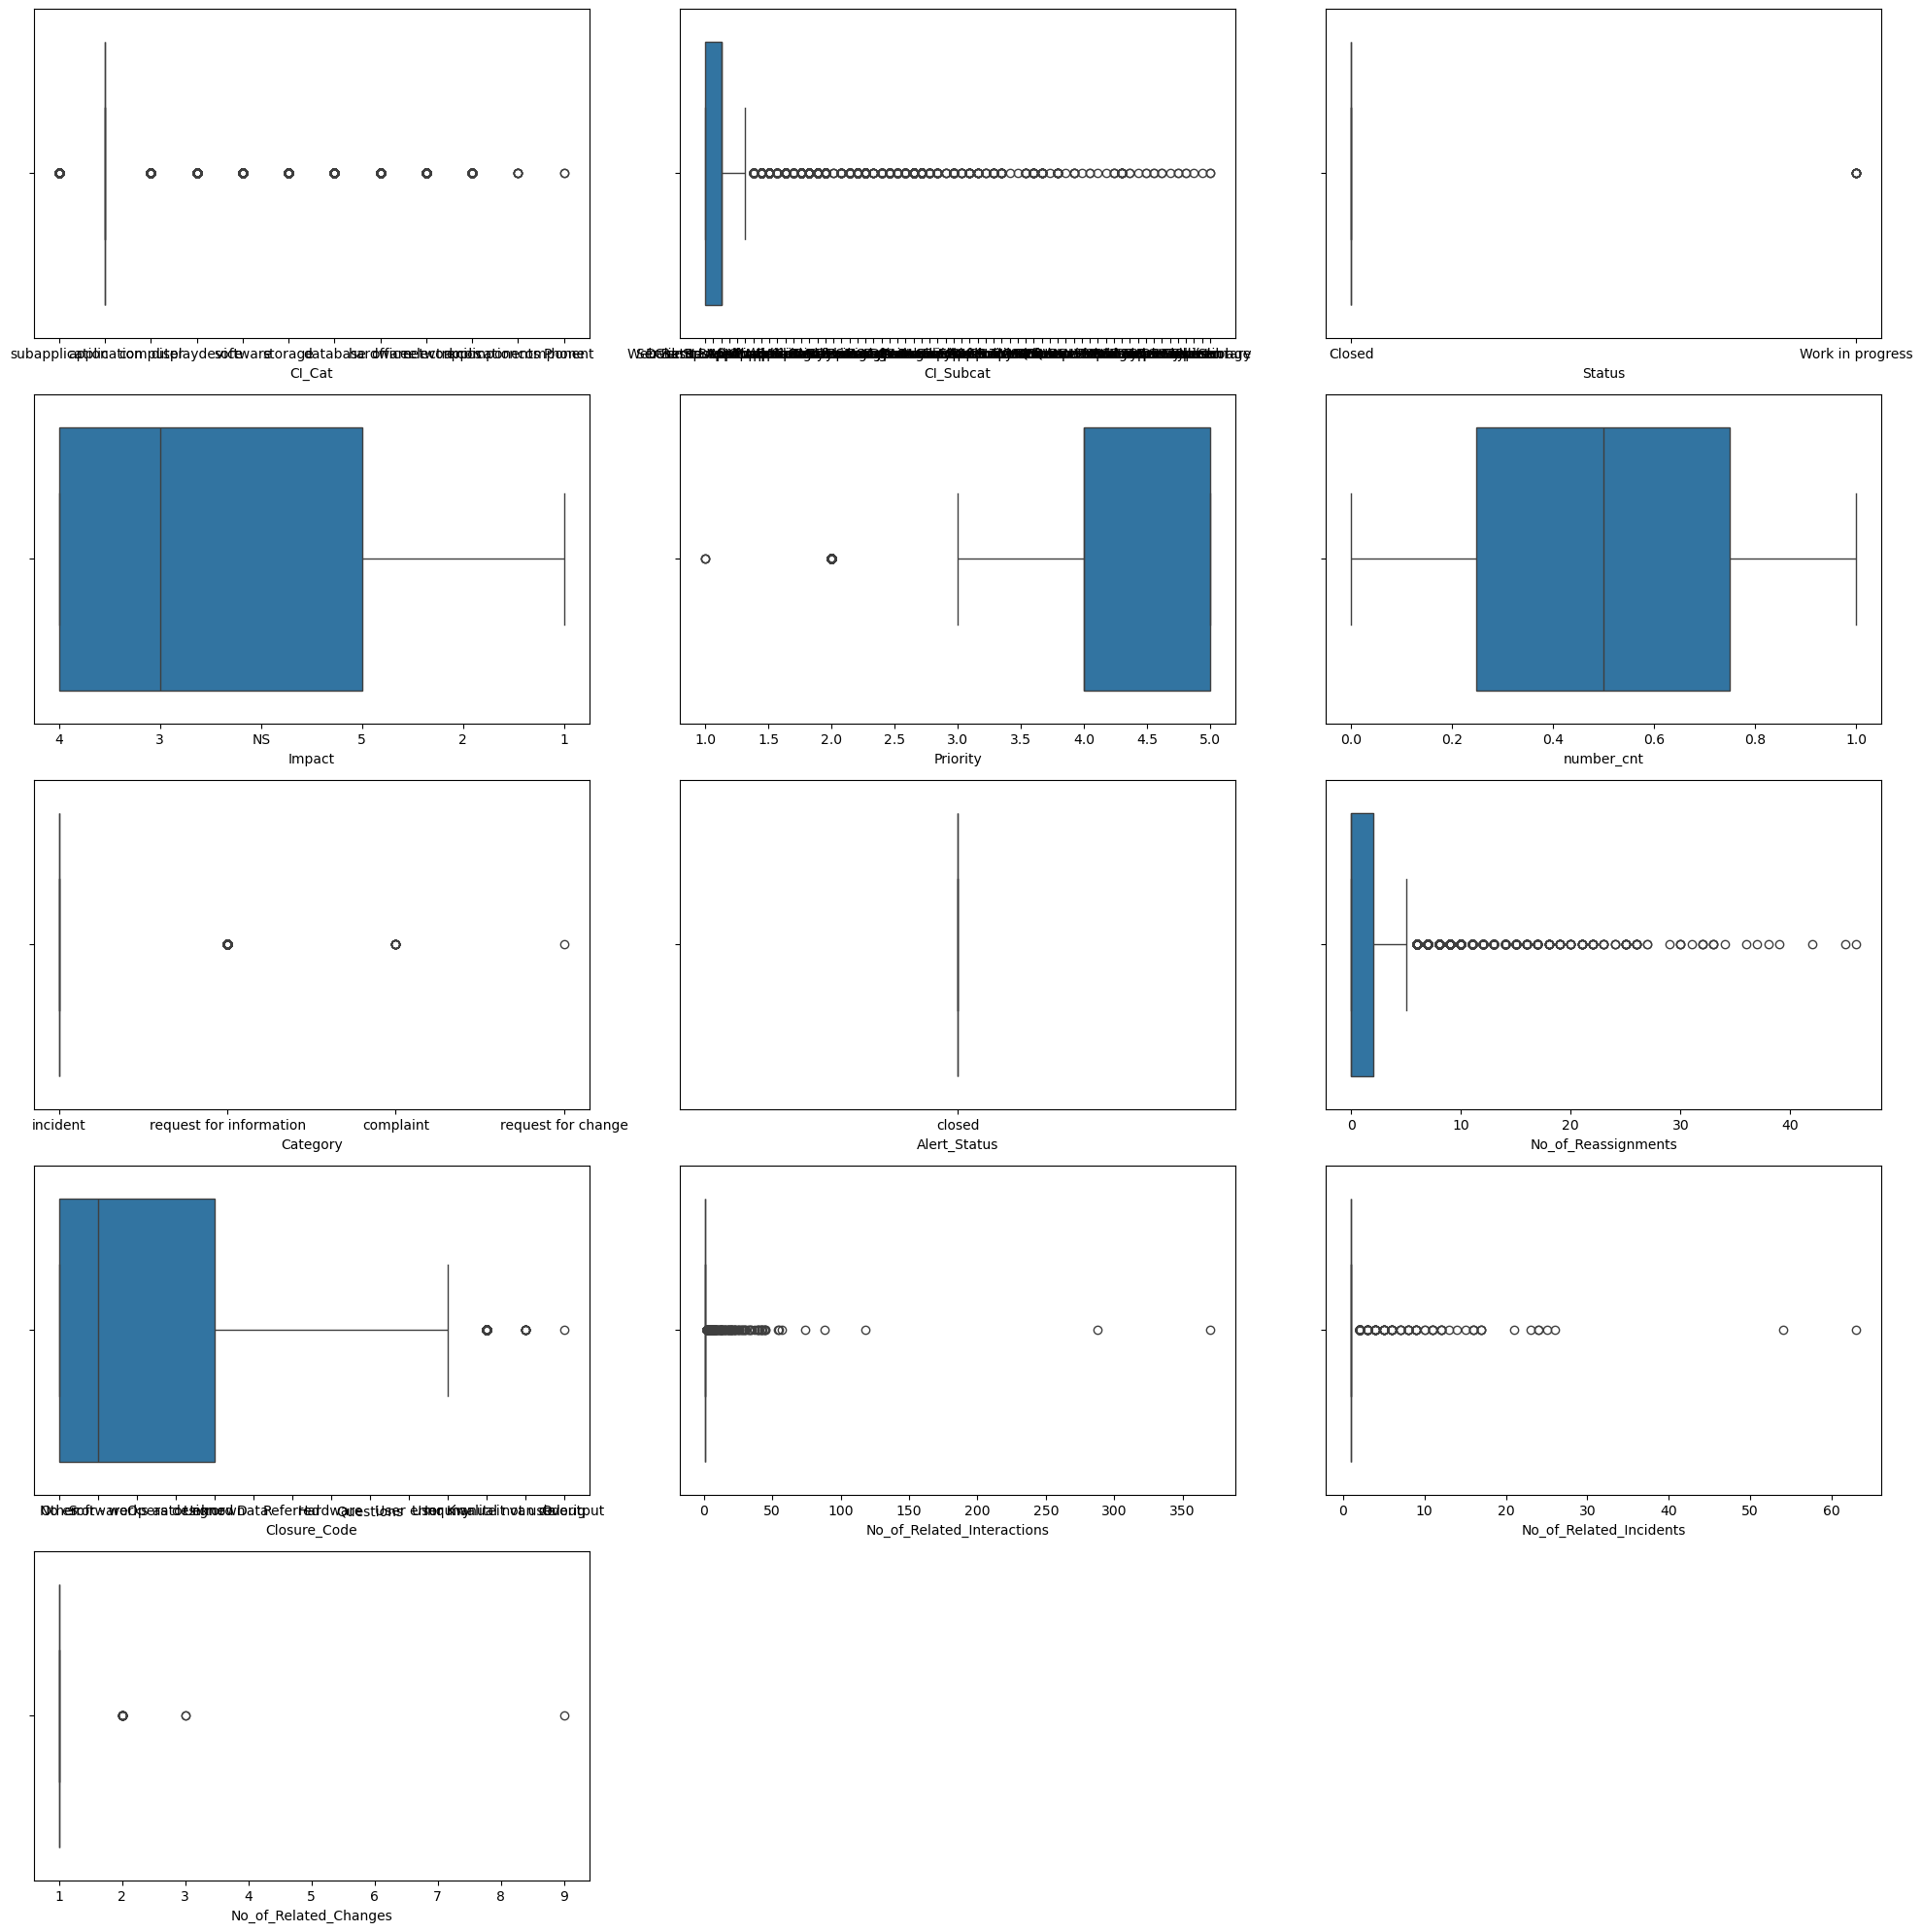

In [30]:
plt.figure(figsize=(20,20))
w = 1
for i in cols:
    plt.subplot(5,3,w)
    sns.boxplot(x = i, data = df )
    w = w+1
plt.tight_layout()

### Insights from EDA
- **Priority:** Most cases have a priority of **4 or 5**, indicating high importance.
- **Reassignments:** **Median is 0, but max is 46**, meaning most cases are resolved quickly, but some require multiple escalations.
- **Related Interactions:** **Median is 1, but max is 370**, suggesting a few cases need extensive follow-ups.
- **Related Incidents & Changes:** **Most cases have just 1, but some outliers exist (Max: 63 incidents, 9 changes).**
- **Outliers in reassignments and interactions** indicate some complex cases needing extra effort.
- **Related_Change:** Contains **null values**, which need to be handled before analysis (either fill or remove).

## Feature Engineering / Data Preprocessing

In [33]:
df.Urgency.value_counts()

Urgency
4               15526
5               12284
4                7062
5                4495
3                4419
3                2117
2                 538
2                 158
1                   5
1                   1
5 - Very Low        1
Name: count, dtype: int64

In [34]:
df.Urgency = df.Urgency.astype("str")
df.Urgency = df.Urgency.str.split("-").str[0].str.strip().astype("int")

In [35]:
df.Urgency.unique()

array([4, 3, 5, 2, 1])

In [36]:
df.CI_Cat.unique()

array(['subapplication', 'application', 'computer', nan, 'displaydevice',
       'software', 'storage', 'database', 'hardware', 'officeelectronics',
       'networkcomponents', 'applicationcomponent', 'Phone'], dtype=object)

In [37]:
for i in df.CI_Cat.unique():
    print(df.loc[df["CI_Cat"] == i ,["CI_Cat", "CI_Subcat"]].value_counts())

CI_Cat          CI_Subcat               
subapplication  Web Based Application       6289
                Server Based Application    1332
                Citrix                       133
                Standard Application          22
                Client Based Application       6
Name: count, dtype: int64
CI_Cat       CI_Subcat               
application  Server Based Application    17478
             Web Based Application        9022
             Desktop Application          3876
             SAP                          1199
             Citrix                        634
             Client Based Application      486
             Exchange                      130
             Standard Application           63
             SharePoint Farm                11
             VMWare                          1
Name: count, dtype: int64
CI_Cat    CI_Subcat                      
computer  Laptop                             1921
          Banking Device                      916
          De

In [38]:
df.Priority.unique()

array([ 4.,  3., nan,  5.,  2.,  1.])

In [39]:
df.Priority.value_counts()

Priority
4.0    22717
5.0    16486
3.0     5323
2.0      697
1.0        3
Name: count, dtype: int64

In [40]:
for i in [1,2]:
    print(df.loc[df["Priority"] == i, ["CI_Cat", "CI_Subcat"]].value_counts())

CI_Cat          CI_Subcat               
application     Web Based Application       1
subapplication  Server Based Application    1
                Web Based Application       1
Name: count, dtype: int64
CI_Cat             CI_Subcat               
computer           Banking Device              412
application        Server Based Application     84
                   Web Based Application        62
                   Desktop Application          36
subapplication     Web Based Application        21
                   Server Based Application     11
computer           Windows Server               11
application        Citrix                       10
networkcomponents  Switch                       10
                   Router                        8
storage            SAN                           5
hardware           DataCenterEquipment           5
networkcomponents  Network Component             3
software           System Software               2
hardware           MigratieDummy     

In [41]:
df.Priority.unique()

array([ 4.,  3., nan,  5.,  2.,  1.])

In [42]:
df.Impact = pd.to_numeric(df["Impact"],errors = "coerce")
df.Urgency = pd.to_numeric(df["Urgency"],errors = "coerce")
df.Priority = pd.to_numeric(df["Priority"],errors = "coerce")

In [43]:
for i in df.Priority.unique():
    print(df.loc[df["Priority"] == i, ["Priority","Impact","Urgency"]].value_counts())

Priority  Impact  Urgency
4.0       4.0     4          22170
                  5            286
          5.0     4            242
                  3             11
          3.0     5              8
Name: count, dtype: int64
Priority  Impact  Urgency
3.0       3.0     3          5077
                  4           144
          4.0     3            97
                  2             3
          5.0     1             1
                  2             1
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Priority  Impact  Urgency
5.0       5.0     5          16486
Name: count, dtype: int64
Priority  Impact  Urgency
2.0       2.0     2          689
                  3            3
          3.0     2            3
                  1            2
Name: count, dtype: int64
Priority  Impact  Urgency
1.0       1.0     1          3
Name: count, dtype: int64


In [44]:
df.Impact.unique()

array([ 4.,  3., nan,  5.,  2.,  1.])

In [45]:
df.Urgency.unique()

array([4, 3, 5, 2, 1])

In [46]:
df.loc[(df["Priority"] == 2) & (df["Urgency"] == 3), "Impact"]

2787     2.0
23963    2.0
45411    2.0
Name: Impact, dtype: float64

In [47]:
df.loc[df["Impact"] == "NS", ["Impact","Priority"]]

,Impact,Priority


In [48]:
df.loc[df["Impact"] == "NS", "Priority"].count()

0

In [49]:
df.loc[df["Priority"] == 1, "number_cnt" ]

34301    0.014412
35098    0.182814
36711    0.653794
Name: number_cnt, dtype: float64

In [50]:
df.loc[(df["Priority"] == 5) & (df["number_cnt"] < 0.1 ), "number_cnt"]

73       0.063647
160      0.009260
220      0.001782
223      0.039350
232      0.074769
           ...   
46382    0.094744
46411    0.009781
46445    0.041083
46454    0.077403
46494    0.019994
Name: number_cnt, Length: 1619, dtype: float64

# Null Handling

In [52]:
cols = [ 'CI_Cat', 'CI_Subcat',  'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 
       'Alert_Status', 'No_of_Reassignments', 'Closure_Code',
       'No_of_Related_Interactions', 
       'No_of_Related_Incidents', 'No_of_Related_Changes','Handle_Time_hrs',"Open_Time","Close_Time"]
df = df[cols]

In [53]:
df.isnull().sum()[df.isnull().sum()>0]

CI_Cat                          111
CI_Subcat                       111
Impact                         1380
Priority                       1380
No_of_Reassignments               1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Handle_Time_hrs                   1
dtype: int64

## CI_Cat

In [55]:
df.CI_Cat.isnull().sum()

111

In [56]:
df.CI_Cat.value_counts()

CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

In [57]:
df.CI_Cat.mode()[0]

'application'

In [58]:
df.loc[df["CI_Cat"].isnull()].head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs,Open_Time,Close_Time
316,NaN,NaN,Closed,5.0,5,5.0,0.278676,incident,closed,5.0,Unknown,1.0,23.0,NaN,"5,28,16,66,667",04-09-2013 11:46,17-12-2013 10:56
538,NaN,NaN,Closed,3.0,3,3.0,0.386611,incident,closed,4.0,Software,1.0,NaN,NaN,"5,61,38,88,889",23-09-2013 09:24,01-10-2013 12:17
593,NaN,NaN,Closed,3.0,3,3.0,0.813316,incident,closed,14.0,Software,1.0,NaN,NaN,"2,09,85,55,556",24-09-2013 09:18,09-10-2013 09:58
670,NaN,NaN,Closed,5.0,5,5.0,0.631470,request for information,closed,0.0,Software,1.0,NaN,NaN,"8,36,18,88,889",25-09-2013 09:54,07-10-2013 09:31
1128,NaN,NaN,Closed,2.0,2,2.0,0.647833,incident,closed,2.0,Operator error,1.0,NaN,1.0,"0,807777778",01-10-2013 08:26,01-10-2013 09:14


In [59]:
df.loc[df["CI_Cat"] == "application"].head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs,Open_Time,Close_Time
1,application,Web Based Application,Closed,3.0,3,3.0,0.415050,incident,closed,33.0,Software,1.0,1.0,NaN,"4,35,47,86,389",12-03-2012 15:44,02-12-2013 12:36
2,application,Desktop Application,Closed,NaN,3,NaN,0.517551,request for information,closed,3.0,No error - works as designed,1.0,NaN,NaN,"4,84,31,19,444",29-03-2012 12:36,13-01-2014 15:13
3,application,Web Based Application,Closed,4.0,4,4.0,0.642927,incident,closed,13.0,Operator error,1.0,NaN,NaN,"4,32,18,33,333",17-07-2012 11:49,14-11-2013 09:31
4,application,Web Based Application,Closed,4.0,4,4.0,0.345258,incident,closed,2.0,Other,1.0,NaN,NaN,"3,38,39,03,333",10-08-2012 11:01,08-11-2013 13:55
5,application,Web Based Application,Closed,4.0,4,4.0,0.006676,incident,closed,4.0,Other,1.0,NaN,NaN,"3,38,34,36,944",10-08-2012 11:27,08-11-2013 13:54


In [60]:
df.loc[df.CI_Cat.isnull(), ["CI_Subcat"]].sum()

CI_Subcat    0
dtype: object

In [61]:
df["CI_Cat"].fillna(df.CI_Cat.mode()[0], inplace=True)

In [62]:
df["CI_Cat"].isnull().sum()

0

## CI_Subcat

In [64]:
df.CI_Subcat.isnull().sum()

111

In [65]:
df.loc[df.CI_Subcat.isnull()].head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs,Open_Time,Close_Time
316,application,NaN,Closed,5.0,5,5.0,0.278676,incident,closed,5.0,Unknown,1.0,23.0,NaN,"5,28,16,66,667",04-09-2013 11:46,17-12-2013 10:56
538,application,NaN,Closed,3.0,3,3.0,0.386611,incident,closed,4.0,Software,1.0,NaN,NaN,"5,61,38,88,889",23-09-2013 09:24,01-10-2013 12:17
593,application,NaN,Closed,3.0,3,3.0,0.813316,incident,closed,14.0,Software,1.0,NaN,NaN,"2,09,85,55,556",24-09-2013 09:18,09-10-2013 09:58
670,application,NaN,Closed,5.0,5,5.0,0.631470,request for information,closed,0.0,Software,1.0,NaN,NaN,"8,36,18,88,889",25-09-2013 09:54,07-10-2013 09:31
1128,application,NaN,Closed,2.0,2,2.0,0.647833,incident,closed,2.0,Operator error,1.0,NaN,1.0,"0,807777778",01-10-2013 08:26,01-10-2013 09:14


In [66]:
df.CI_Subcat.mode()[0]

'Server Based Application'

In [67]:
df.CI_Subcat.fillna(df.CI_Subcat.mode()[0], inplace=True)

In [68]:
df.CI_Subcat.isnull().sum()

0

## Closure_Code

In [70]:
df.Closure_Code.isnull().sum()

460

In [71]:
df.Closure_Code.value_counts()

Closure_Code
Other                           16470
Software                        13027
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: count, dtype: int64

In [72]:
df.Closure_Code.mode()[0]

'Other'

In [73]:
df.Closure_Code.fillna(df.Closure_Code.mode()[0], inplace=True)

In [74]:
df.Closure_Code.isnull().sum()

0

## No_of_Reassignments

In [76]:
df.No_of_Reassignments.isnull().sum()

1

In [77]:
df.No_of_Reassignments.value_counts()

No_of_Reassignments
0.0     27468
1.0      7268
2.0      5378
3.0      2191
4.0      1606
5.0       721
6.0       622
7.0       329
8.0       246
9.0       170
10.0      146
11.0      101
13.0       61
12.0       58
14.0       47
15.0       43
17.0       27
16.0       25
18.0       14
21.0       11
22.0       10
25.0       10
19.0       10
20.0        7
26.0        7
23.0        5
24.0        3
32.0        3
33.0        3
30.0        3
27.0        2
46.0        1
42.0        1
39.0        1
37.0        1
45.0        1
38.0        1
34.0        1
29.0        1
31.0        1
36.0        1
Name: count, dtype: int64

In [78]:
df.No_of_Reassignments.mode()[0]

0.0

In [79]:
df.No_of_Reassignments.fillna(df.No_of_Reassignments.mode()[0], inplace=True)

In [80]:
df.No_of_Reassignments.isnull().sum()

0

## No_of_Related_Interactions

In [82]:
df.No_of_Related_Interactions.isnull().sum()

114

In [83]:
df.No_of_Related_Interactions.value_counts()

No_of_Related_Interactions
1.0      43058
2.0       2736
3.0        429
4.0        124
5.0         30
6.0         16
7.0         12
8.0          6
12.0         6
9.0          5
20.0         5
13.0         4
42.0         3
22.0         3
19.0         3
10.0         3
15.0         3
39.0         2
26.0         2
11.0         2
33.0         2
44.0         2
17.0         2
16.0         2
14.0         2
23.0         2
45.0         2
18.0         2
34.0         2
29.0         2
28.0         2
55.0         1
43.0         1
25.0         1
27.0         1
370.0        1
40.0         1
37.0         1
57.0         1
118.0        1
24.0         1
74.0         1
41.0         1
30.0         1
88.0         1
31.0         1
54.0         1
288.0        1
21.0         1
Name: count, dtype: int64

In [84]:
df.loc[df.No_of_Related_Interactions == 0]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs,Open_Time,Close_Time


In [85]:
df.loc[df.No_of_Related_Interactions.isnull(), "No_of_Related_Changes"].count()

0

In [86]:
df.No_of_Related_Interactions.mode()[0]

1.0

In [87]:
df.No_of_Related_Interactions.fillna(df.No_of_Related_Interactions.mode()[0], inplace=True)

In [88]:
df.No_of_Related_Interactions.isnull().sum()

0

## No_of_Related_Incidents

In [90]:
df.No_of_Related_Incidents.isnull().sum()

45384

In [91]:
df.No_of_Related_Incidents.value_counts()

No_of_Related_Incidents
1.0     1057
2.0       74
3.0       20
4.0       13
5.0        8
6.0        8
9.0        6
8.0        5
11.0       4
12.0       4
7.0        4
17.0       3
16.0       3
10.0       2
24.0       2
14.0       1
25.0       1
23.0       1
54.0       1
26.0       1
21.0       1
63.0       1
13.0       1
15.0       1
Name: count, dtype: int64

In [92]:
df.loc[df.No_of_Related_Incidents == 0]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs,Open_Time,Close_Time


In [93]:
df.No_of_Related_Incidents.fillna(0,inplace=True)

In [94]:
df.No_of_Related_Incidents.isnull().sum()

0

## No_of_Related_Changes

In [96]:
df.No_of_Related_Changes.isnull().sum()

46046

In [97]:
df.No_of_Related_Changes.value_counts()

No_of_Related_Changes
1.0    536
2.0     21
3.0      2
9.0      1
Name: count, dtype: int64

In [98]:
df.No_of_Related_Changes.fillna(0,inplace=True)

In [99]:
df.No_of_Related_Changes.isnull().sum()

0

## Impact

In [101]:
df.Impact.isnull().sum()

1380

In [102]:
df.Impact.value_counts()

Impact
4.0    22556
5.0    16741
3.0     5234
2.0      692
1.0        3
Name: count, dtype: int64

In [103]:
df.Impact.replace("NS", np.nan, inplace=True)

In [104]:
df.Impact.unique()

array([ 4.,  3., nan,  5.,  2.,  1.])

In [105]:
df.Impact.mode()[0]

4.0

In [106]:
df.Impact.fillna(df.Impact.mode()[0],inplace=True)

In [107]:
df.Impact.isnull().sum()

0

## Priority

In [109]:
for i in df.Priority.unique():
    print(df.loc[df["Priority"] == i, ["Priority","Impact","Urgency"]].value_counts())

Priority  Impact  Urgency
4.0       4.0     4          22170
                  5            286
          5.0     4            242
                  3             11
          3.0     5              8
Name: count, dtype: int64
Priority  Impact  Urgency
3.0       3.0     3          5077
                  4           144
          4.0     3            97
                  2             3
          5.0     1             1
                  2             1
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Priority  Impact  Urgency
5.0       5.0     5          16486
Name: count, dtype: int64
Priority  Impact  Urgency
2.0       2.0     2          689
                  3            3
          3.0     2            3
                  1            2
Name: count, dtype: int64
Priority  Impact  Urgency
1.0       1.0     1          3
Name: count, dtype: int64


In [110]:
df.loc[df.Impact == "NS", "Priority"].isnull().sum()

0

In [111]:
df.Priority.isnull().sum()

1380

In [112]:
df.loc[(df['Impact'] == 4) & (df['Urgency'] == 3) & (df['Priority'].isnull()), 'Priority'] = 3

In [113]:
df.loc[(df['Impact'] == 4) & (df['Urgency'] == 4) & (df['Priority'].isnull()), 'Priority'] = 4

In [114]:
df.Priority.isnull().sum()

0

## Handle_Time_hrs

In [116]:
pd.to_datetime(df.Open_Time, format= "%d-%m-%Y %H:%M")
pd.to_datetime(df.Close_Time, format= "%d-%m-%Y %H:%M")

0       2013-11-04 13:51:00
1       2013-12-02 12:36:00
2       2014-01-13 15:13:00
3       2013-11-14 09:31:00
4       2013-11-08 13:55:00
                ...        
46601   2014-03-31 16:29:00
46602   2014-03-31 15:29:00
46603   2014-03-31 15:32:00
46604   2014-03-31 15:42:00
46605   2014-03-31 22:47:00
Name: Close_Time, Length: 46606, dtype: datetime64[ns]

In [117]:
df.Handle_Time_hrs = abs(pd.to_datetime(df.Close_Time, format= "%d-%m-%Y %H:%M") - pd.to_datetime(df.Open_Time, format= "%d-%m-%Y %H:%M")).dt.total_seconds()/3600

In [118]:
df.Handle_Time_hrs

0        15312.316667
1        15116.866667
2        15722.616667
3        11637.700000
4        10922.900000
             ...     
46601        0.100000
46602        0.433333
46603        0.066667
46604        0.116667
46605        5.383333
Name: Handle_Time_hrs, Length: 46606, dtype: float64

In [119]:
df.drop(columns=["Close_Time","Alert_Status"],axis=1, inplace=True)

In [120]:
df.isnull().sum()

CI_Cat                        0
CI_Subcat                     0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
No_of_Reassignments           0
Closure_Code                  0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Handle_Time_hrs               0
Open_Time                     0
dtype: int64

# Encoding

In [122]:
cols = ['CI_Cat', 'CI_Subcat','Status','Category', 'Closure_Code']

In [123]:
label = LabelEncoder()

In [124]:
for cols in cols:
    df[cols] = label.fit_transform(df[cols])

In [125]:
df.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs,Open_Time
0,11,57,0,4.0,4,4.0,0.601292,1,26.0,6,1.0,2.0,0.0,15312.316667,05-02-2012 13:32
1,1,57,0,3.0,3,3.0,0.415050,1,33.0,10,1.0,1.0,0.0,15116.866667,12-03-2012 15:44
2,1,10,0,4.0,3,3.0,0.517551,3,3.0,4,1.0,0.0,0.0,15722.616667,29-03-2012 12:36
3,1,57,0,4.0,4,4.0,0.642927,1,13.0,5,1.0,0.0,0.0,11637.700000,17-07-2012 11:49
4,1,57,0,4.0,4,4.0,0.345258,1,2.0,6,1.0,0.0,0.0,10922.900000,10-08-2012 11:01


In [126]:
label.classes_

array(['Data', 'Hardware', 'Inquiry', 'Kwaliteit van de output',
       'No error - works as designed', 'Operator error', 'Other',
       'Overig', 'Questions', 'Referred', 'Software', 'Unknown',
       'User error', 'User manual not used'], dtype=object)

## Normalization

In [128]:
mms = MinMaxScaler()

In [129]:
df["Handle_Time_hrs"] = mms.fit_transform(df[["Handle_Time_hrs"]])

In [130]:
df.Handle_Time_hrs

0        0.973904
1        0.961473
2        1.000000
3        0.740188
4        0.694725
           ...   
46601    0.000006
46602    0.000028
46603    0.000004
46604    0.000007
46605    0.000342
Name: Handle_Time_hrs, Length: 46606, dtype: float64

### Insights
1. **Data Type Conversion:**
   - Converted the **Urgency** column to a string, split it by hyphen ("-"), extracted the first part, stripped spaces, and converted it back to an integer.
   - Converted the **Impact** and **Priority** columns to numeric types, coercing errors to `NaN`.

2. **Filling Missing Values (NaN):**
   - Filled missing values in categorical columns like **CI_Cat**, **CI_Subcat**, and **Closure_Code** using the **mode** (most frequent value).
   - Filled missing values in numerical columns like **No_of_Reassignments**, **No_of_Related_Interactions** with the **mode**, and for **No_of_Related_Incidents** and **No_of_Related_Changes** with **0**.
   - Replaced the value **"NS"** in the **Impact** column with `NaN` and then filled missing values in **Impact** with the mode.

3. **Data Cleanup:**
   - Dropped the **Close_Time** and **Alert_Status** columns as they were not needed.

4. **Calculating Handling Time:**
   - Created a new column **Handle_Time_hrs** by calculating the difference between **Close_Time** and **Open_Time** in hours, using **abs()** to ensure the time is positive.

5. **MinMax Scaling:**
   - Applied **MinMaxScaler** to the **Handle_Time_hrs** column to scale the values between 0 and 1 for normalization, improving the performance of machine learning models.

6. **Label Encoding:**
   - Applied **Label Encoding** to the following categorical columns to convert them into numeric values: 
     - **CI_Cat**
     - **CI_Subcat**
     - **Status**
     - **Category**
     - **Closure_Code**

## Feature Selection

### Correlation

In [134]:
corr = df.drop(columns = ['Open_Time']).corr()
corr

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs
CI_Cat,1.000000,0.199085,-0.000489,-0.053643,-0.048221,-0.042766,0.002004,-0.105516,-0.087445,-0.042221,-0.012490,-0.017156,0.004477,-0.027959
CI_Subcat,0.199085,1.000000,-0.032448,0.073399,0.095688,0.091091,-0.004930,0.030193,0.027461,0.104601,-0.013018,0.000559,0.010607,0.045755
Status,-0.000489,-0.032448,1.000000,-0.022083,-0.022811,-0.022649,0.006368,-0.006721,0.001234,-0.006676,-0.000814,-0.001009,-0.001431,-0.003241
Impact,-0.053643,0.073399,-0.022083,1.000000,0.953839,0.965476,-0.000054,0.478724,0.088287,-0.091811,-0.018950,-0.066063,-0.042091,0.038952
Urgency,-0.048221,0.095688,-0.022811,0.953839,1.000000,0.990637,0.000817,0.470580,0.090753,-0.089882,-0.022843,-0.064815,-0.045624,0.038763
Priority,-0.042766,0.091091,-0.022649,0.965476,0.990637,1.000000,0.000496,0.474004,0.090157,-0.090871,-0.023109,-0.064679,-0.045080,0.039142
number_cnt,0.002004,-0.004930,0.006368,-0.000054,0.000817,0.000496,1.000000,0.010799,-0.001697,-0.001899,0.000870,-0.005478,0.002851,0.000031
Category,-0.105516,0.030193,-0.006721,0.478724,0.470580,0.474004,0.010799,1.000000,0.077107,-0.144793,-0.008890,-0.027583,-0.036518,0.013208
No_of_Reassignments,-0.087445,0.027461,0.001234,0.088287,0.090753,0.090157,-0.001697,0.077107,1.000000,-0.059459,0.036764,0.026646,0.008098,0.364636
Closure_Code,-0.042221,0.104601,-0.006676,-0.091811,-0.089882,-0.090871,-0.001899,-0.144793,-0.059459,1.000000,0.005651,0.010703,0.046621,-0.028227


<Axes: >

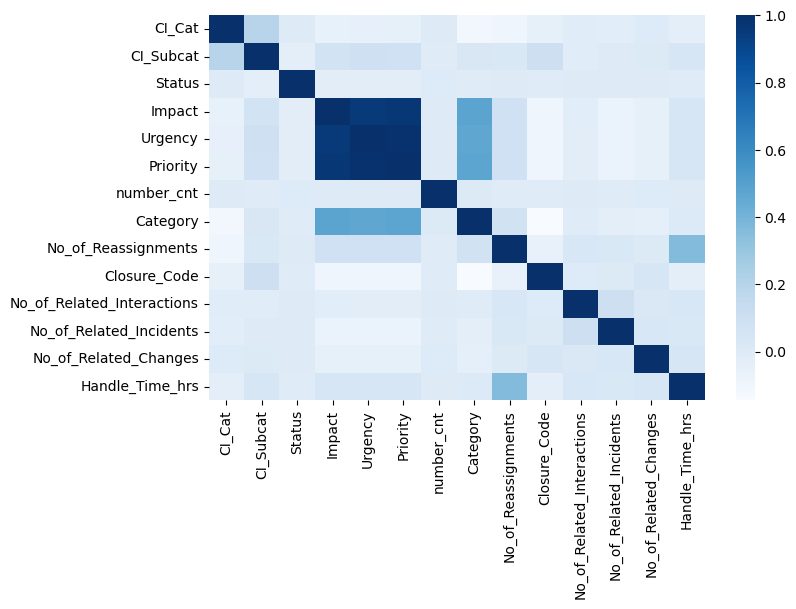

In [135]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap="Blues")

### Insights 

1. **Highly Correlated Features:**
   - **Impact**, **Urgency**, and **Priority** are highly correlated. Even though they overlap, all provide critical insights into the case urgency and priority, so they should be kept.

2. **Moderate Correlations:**
   - **No_of_Reassignments** and **Handle_Time_hrs** have moderate correlation (0.3646), but both contribute valuable information regarding case handling and resolution time, so they should remain.

3. **Low Correlations:**
   - Features like **Status**, **No_of_Related_Interactions**, **Closure_Code**, **No_of_Related_Incidents**, and **No_of_Related_Changes** have low correlations, but they may still provide unique insights and domain-specific relevance, so they should be retained.

All columns are important and have unique contributions, so none were removed. 

## Data Splitting

In [138]:
x = df.drop(columns=["Priority",'Open_Time'])
y = df.Priority

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y,random_state=42)

In [140]:
y_test.value_counts()

Priority
4.0    4550
5.0    3298
3.0    1334
2.0     139
1.0       1
Name: count, dtype: int64

In [141]:
y_train.value_counts()

Priority
4.0    18199
5.0    13188
3.0     5337
2.0      558
1.0        2
Name: count, dtype: int64

In [142]:
x_train.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs
21874,3,21,0,5.0,5,0.858034,1,0.0,1,1.0,0.0,0.0,0.009381
11520,1,45,0,3.0,3,0.838452,1,0.0,1,1.0,0.0,0.0,0.001835
40448,6,25,0,4.0,4,0.910313,1,1.0,12,1.0,0.0,0.0,0.000003
16160,8,37,0,4.0,4,0.600891,1,0.0,10,1.0,0.0,0.0,0.001856
33583,1,57,0,4.0,4,0.714692,1,5.0,10,1.0,1.0,0.0,0.030496


## Model Implementation and Model Evaluation

### 1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

## Decision tree

In [146]:
np.unique(y_train)

array([1., 2., 3., 4., 5.])

In [147]:
y_train.value_counts()

Priority
4.0    18199
5.0    13188
3.0     5337
2.0      558
1.0        2
Name: count, dtype: int64

In [148]:
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [149]:
tree.fit(x_train,y_train)
y_hat_tree = tree.predict(x_test)
y_hat_tree_train = tree.predict(x_train)

In [150]:
f1_score(y_test,y_hat_tree,average='weighted')

1.0

In [151]:
f1_score(y_train,y_hat_tree_train,average='weighted')

1.0

In [152]:
f1_score(y_test,y_hat_tree,average='weighted')

1.0

In [153]:
accuracy_score(y_test,y_hat_tree)

1.0

In [154]:
print(classification_report(y_test,y_hat_tree))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00       139
         3.0       1.00      1.00      1.00      1334
         4.0       1.00      1.00      1.00      4550
         5.0       1.00      1.00      1.00      3298

    accuracy                           1.00      9322
   macro avg       1.00      1.00      1.00      9322
weighted avg       1.00      1.00      1.00      9322



In [155]:
pd.crosstab(y_test,y_hat_tree)

col_0,1.0,2.0,3.0,4.0,5.0
Priority,,,,,
1.0,1,0,0,0,0
2.0,0,139,0,0,0
3.0,0,0,1334,0,0
4.0,0,0,0,4550,0
5.0,0,0,0,0,3298


### **Model Performance Overview by Scores**  

#### **Decision Tree Classifier**  

- **F1-score (Test)**: **1.00**  
- **F1-score (Train)**: **1.00**  
- **Accuracy (Test)**: **100%**  
- **Accuracy (Train)**: **100%**  
- **Precision (Test)**: **1.00**  
- **Precision (Train)**: **1.00**  
- **Recall (Test)**: **1.00**  
- **Recall (Train)**: **1.00** 

### **Conclusion**  

In thitaskct, a **Decision Tree Classifier** was developed and evaluated to predict **high-priority tickets (Priority 1 & 2)** based on **urgency and impact**. Given that these factors have an **ordinal relationship**, a Decision Tree is well-suited for this task, as it follows a structured rule-based approach.  

The key findings from the evaluation are as follows:  

- **Decision Tree Classifier** achieved a perfect **F1-score (1.00) and accuracy (100%)** on both training and test datasets. This indicates that the model is highly effective in capturing the decision-making process based on urgency and impact.  

---

### **Key Takeaways**  

- **Decision Tree Classifier** is an optimal choice since it aligns well with the **hierarchical nature of urgency and impact**. The model interprets decision paths clearly, making it easy to understand why a particular priority is assigned.  
- The **perfect performance is expected**, as Decision Trees naturally work well when mapping ordinal variables to categorical outputs. Unlike black-box models, Decision Trees maintain **interpretability**, which is crucial for ticket prioritization.  
- While overfitting is a common concern, in this case, the structured nature of priority classification ensures that the model remains **reliable and interpretable**, making it an ideal solution.  


### 2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning. 

In [159]:
df = pd.read_csv('time_seriesdata.csv')

### Incident Volume Per Day

In [161]:
df.head()

,Open_Time,Incident_ID,CI_Cat
0,2012-02-05 13:32:00,IM0000004,subapplication
1,2012-03-12 15:44:00,IM0000005,application
2,2012-03-29 12:36:00,IM0000006,application
3,2012-07-17 11:49:00,IM0000011,application
4,2012-08-10 11:01:00,IM0000012,application


In [162]:
df['Open_Time'] = pd.to_datetime(df['Open_Time'])

In [163]:
df.set_index('Open_Time', inplace=True)

In [164]:
incident_counts = df.groupby('CI_Cat').resample('D').size().reset_index(name='Incident_Count')
incident_counts_pivot = incident_counts.pivot_table(index='Open_Time', columns='CI_Cat', values='Incident_Count', aggfunc='sum', fill_value=0)
incident_counts_pivot

CI_Cat,Phone,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication
Open_Time,,,,,,,,,,,,
2012-02-05,0,0,0,0,0,0,0,0,0,0,0,1
2012-02-06,0,0,0,0,0,0,0,0,0,0,0,0
2012-02-07,0,0,0,0,0,0,0,0,0,0,0,0
2012-02-08,0,0,0,0,0,0,0,0,0,0,0,0
2012-02-09,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27,0,188,0,14,0,2,2,0,10,2,2,49
2014-03-28,0,136,0,9,0,0,5,0,1,2,7,45
2014-03-29,0,2,0,1,0,0,0,0,0,0,0,2


In [165]:
total_incident_volume = incident_counts_pivot.sum()
print(total_incident_volume)

CI_Cat
Phone                       2
application             33010
applicationcomponent        5
computer                 3643
database                  214
displaydevice             212
hardware                  442
networkcomponents         107
officeelectronics         152
software                  333
storage                   703
subapplication           7782
dtype: int64


### Incident Volume Quaterly

In [167]:
incident_quarterly = df.resample('Q').size() 
incident_quarterly

incident_quarterly_by_category = df.groupby([pd.Grouper(freq='Q'), 'CI_Cat']).size().unstack(fill_value=0)
incident_quarterly_by_category

CI_Cat,Phone,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication
Open_Time,,,,,,,,,,,,
2012-03-31,0,2,0,0,0,0,0,0,0,0,0,1
2012-09-30,0,8,0,0,0,0,0,0,0,0,0,0
2012-12-31,0,8,0,0,0,0,0,0,0,0,0,2
2013-03-31,0,16,0,0,0,0,0,0,0,0,0,8
2013-06-30,0,73,0,1,0,0,0,0,0,0,0,8
2013-09-30,0,811,0,80,4,3,3,0,2,3,2,115
2013-12-31,1,16754,5,1999,49,117,136,58,89,150,327,3792
2014-03-31,1,15338,0,1563,161,92,303,49,61,180,374,3856


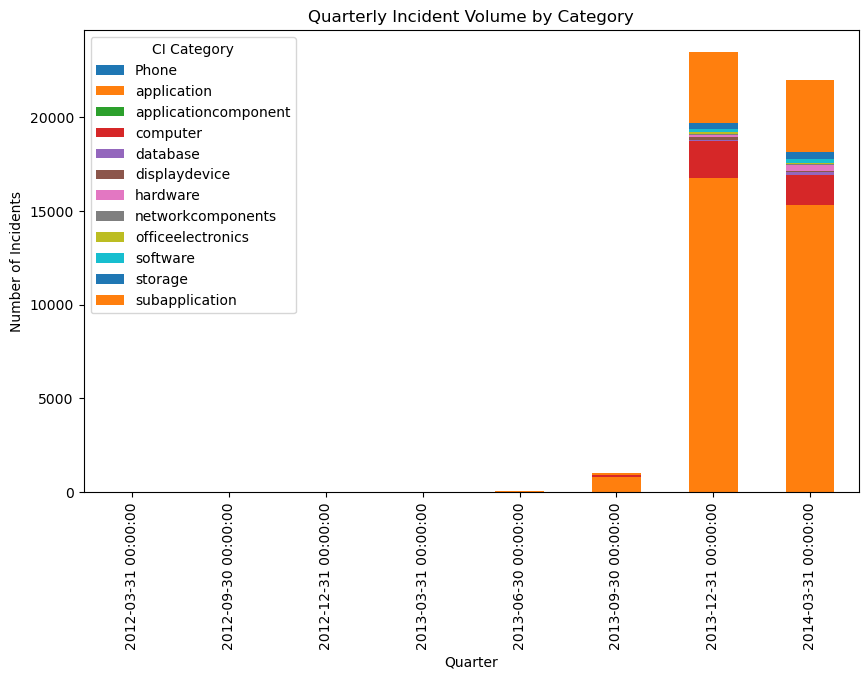

In [168]:
incident_quarterly_by_category.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Quarterly Incident Volume by Category')
plt.xlabel('Quarter')
plt.ylabel('Number of Incidents')
plt.legend(title='CI Category')
plt.show()

In [169]:
incident_quarterly_total = incident_quarterly.resample('Q').sum()
incident_quarterly_total

Open_Time
2012-03-31        3
2012-06-30        0
2012-09-30        8
2012-12-31       10
2013-03-31       24
2013-06-30       82
2013-09-30     1023
2013-12-31    23477
2014-03-31    21978
Freq: QE-DEC, dtype: int64

In [170]:
def test_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")
        
test_stationarity(incident_quarterly_total)

ADF Statistic: 3.769684095341291
p-value: 1.0
The series is not stationary.


In [171]:
incident_quarterly_total_diff1 = incident_quarterly_total.diff().dropna()  
print("\nADF test after First Differencing:")
test_stationarity(incident_quarterly_total_diff1)


ADF test after First Differencing:
ADF Statistic: 3.464920182735326
p-value: 1.0
The series is not stationary.


In [172]:
incident_quarterly_total_diff2 = incident_quarterly_total_diff1.diff().dropna()  
print("\nADF test after Second Differencing:")
test_stationarity(incident_quarterly_total_diff2)


ADF test after Second Differencing:
ADF Statistic: -4.4513803996637895
p-value: 0.0002404844800506632
The series is stationary.


### Split the data into training (80%) and testing (20%) sets

In [174]:
train_total = incident_quarterly_total_diff2[:int(0.8 * len(incident_quarterly_total_diff2))]
test_total = incident_quarterly_total_diff2[int(0.8 * len(incident_quarterly_total_diff2)):] 

In [175]:
def evaluate_arima_order(train, p_values, d_values, q_values):
    best_aic = np.inf  
    best_order = None
    p = d = q = range(0,2)
    pdq = list(itertools.product(p,d,q))

    for p, d, q in pdq:
        try:
            model = ARIMA(train, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)
        except Exception as e:
            continue  
                
    return best_order, best_aic
p = d = q = range(0,2)
best_order, best_aic = evaluate_arima_order(train_total,
                                            p, d, q)

print(f"Best ARIMA Model Parameters:")
print(f"Non-seasonal order (p, d, q): {best_order}")
print(f"Best AIC: {best_aic}")

Best ARIMA Model Parameters:
Non-seasonal order (p, d, q): (0, 1, 0)
Best AIC: 61.673308351567016


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [176]:
incident_quarterly_by_category = df.groupby([pd.Grouper(freq='Q'), 'CI_Cat']).size().unstack(fill_value=0)
print(incident_quarterly_by_category.tail())

CI_Cat      Phone  application  applicationcomponent  computer  database  \
Open_Time                                                                  
2013-03-31      0           16                     0         0         0   
2013-06-30      0           73                     0         1         0   
2013-09-30      0          811                     0        80         4   
2013-12-31      1        16754                     5      1999        49   
2014-03-31      1        15338                     0      1563       161   

CI_Cat      displaydevice  hardware  networkcomponents  officeelectronics  \
Open_Time                                                                   
2013-03-31              0         0                  0                  0   
2013-06-30              0         0                  0                  0   
2013-09-30              3         3                  0                  2   
2013-12-31            117       136                 58                 89   
2014-

### Forecast of incident volume in each category


Forecasting for Category: Phone


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


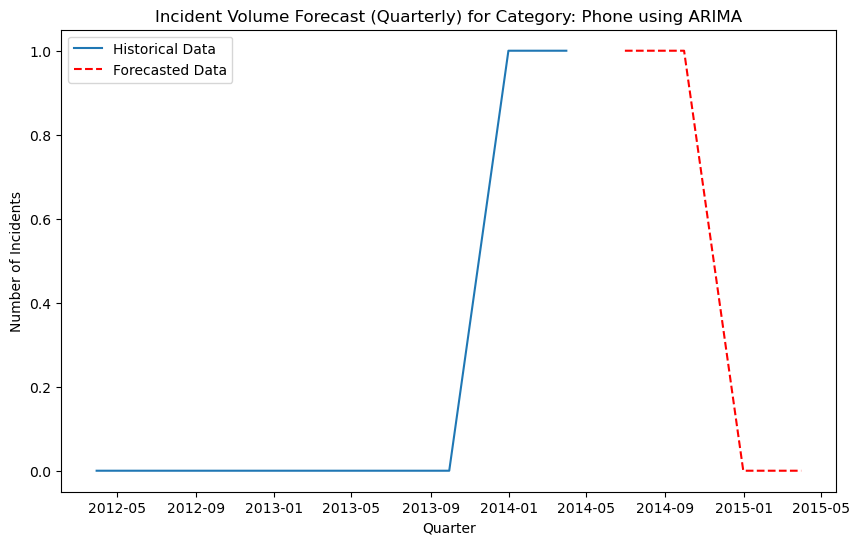

Forecasted Annual Incident Volume for Category Phone for Next Year: 2.0

Forecasting for Category: application


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


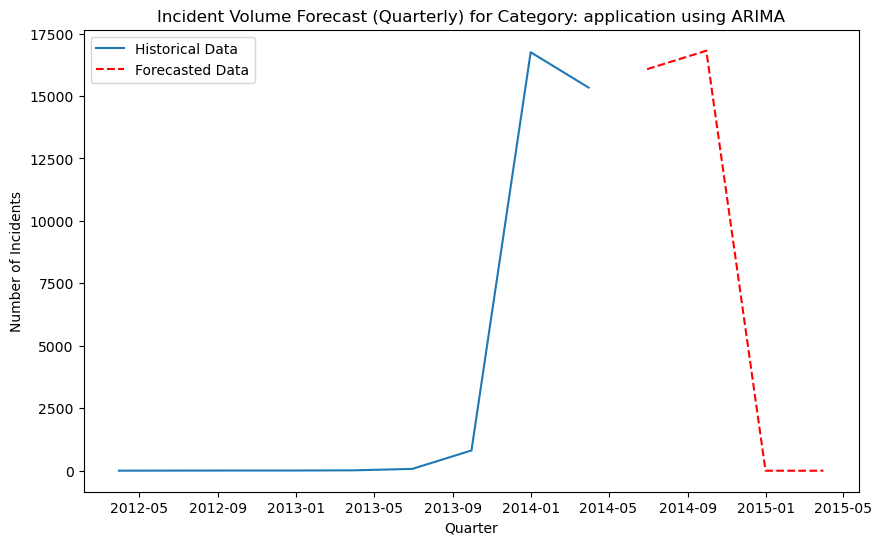

Forecasted Annual Incident Volume for Category application for Next Year: 32890.0

Forecasting for Category: applicationcomponent


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


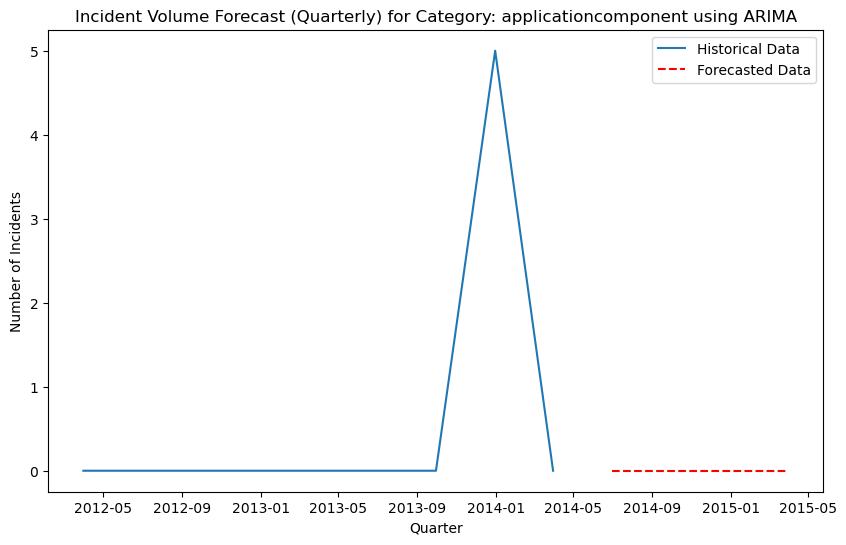

Forecasted Annual Incident Volume for Category applicationcomponent for Next Year: 0.0

Forecasting for Category: computer


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


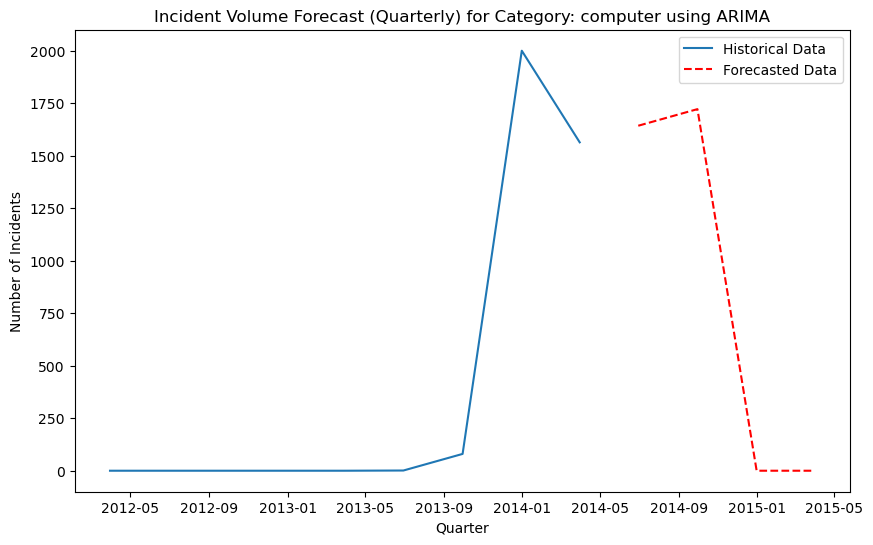

Forecasted Annual Incident Volume for Category computer for Next Year: 3363.0

Forecasting for Category: database


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


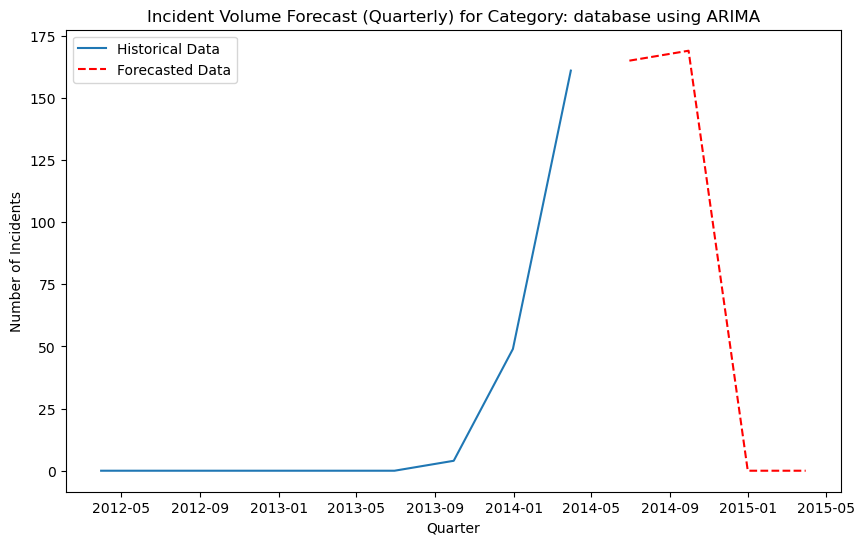

Forecasted Annual Incident Volume for Category database for Next Year: 334.0

Forecasting for Category: displaydevice


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


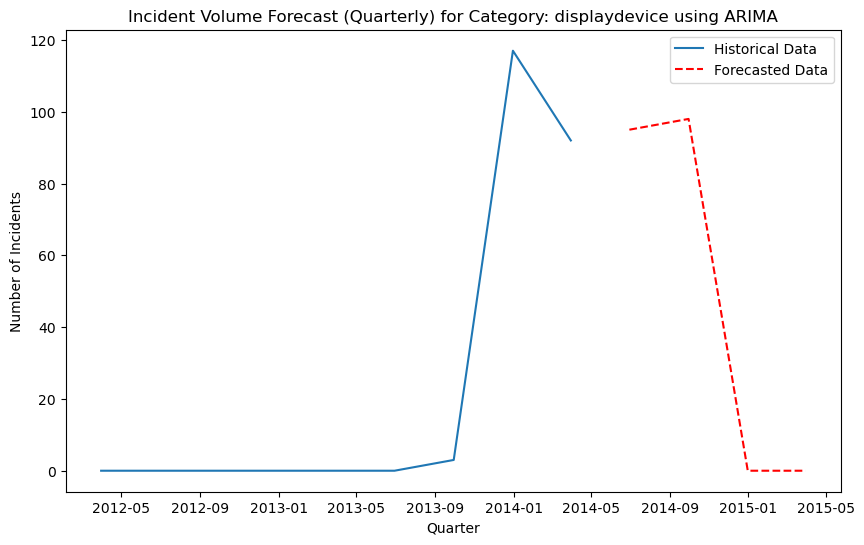

Forecasted Annual Incident Volume for Category displaydevice for Next Year: 193.0

Forecasting for Category: hardware


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


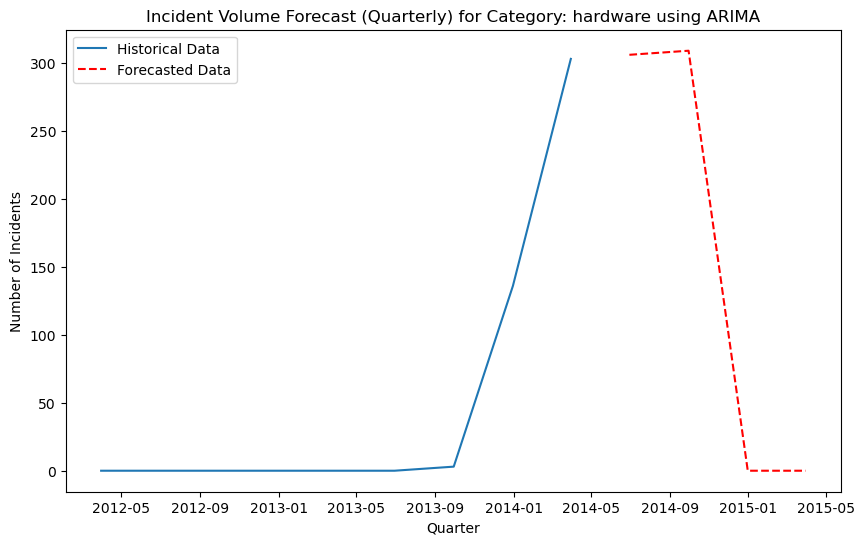

Forecasted Annual Incident Volume for Category hardware for Next Year: 615.0

Forecasting for Category: networkcomponents


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


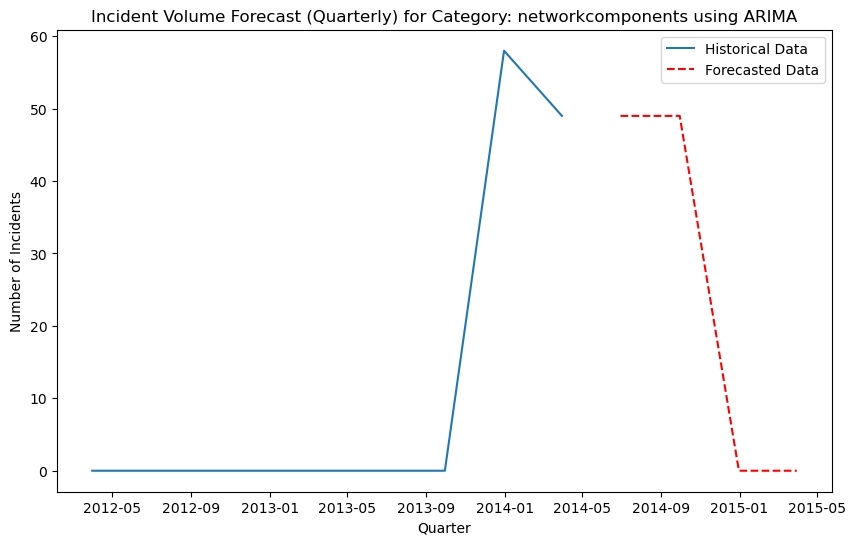

Forecasted Annual Incident Volume for Category networkcomponents for Next Year: 98.0

Forecasting for Category: officeelectronics


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


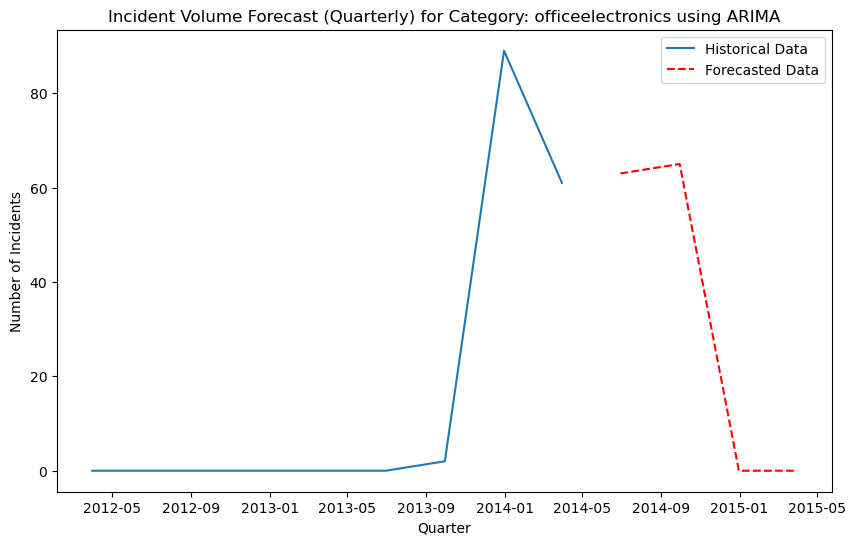

Forecasted Annual Incident Volume for Category officeelectronics for Next Year: 128.0

Forecasting for Category: software


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


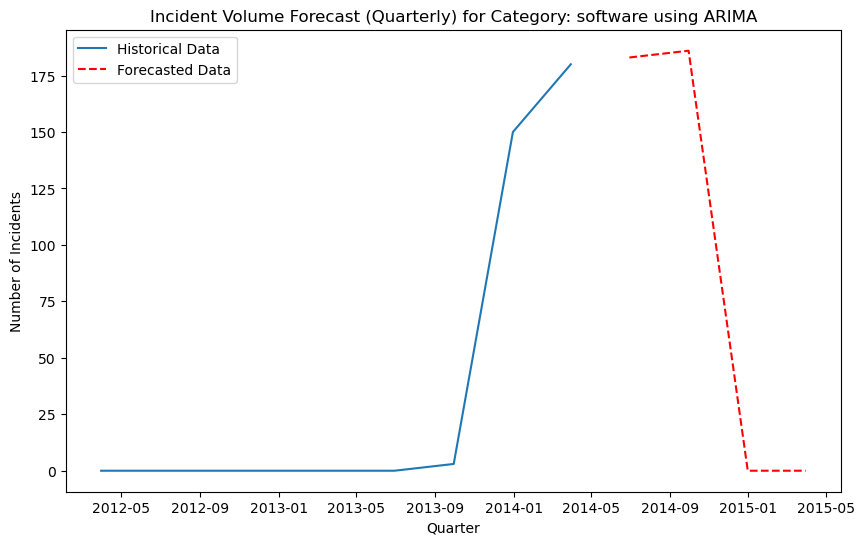

Forecasted Annual Incident Volume for Category software for Next Year: 369.0

Forecasting for Category: storage


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


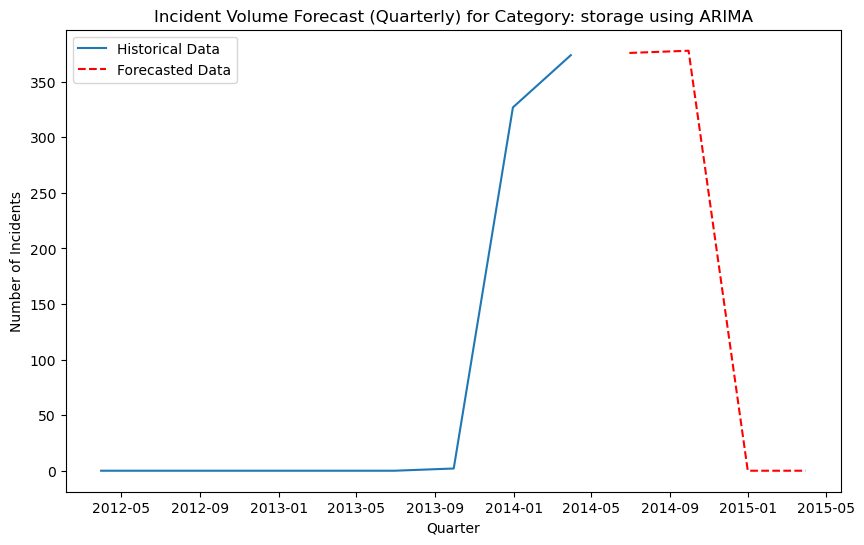

Forecasted Annual Incident Volume for Category storage for Next Year: 754.0

Forecasting for Category: subapplication


C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\sivas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


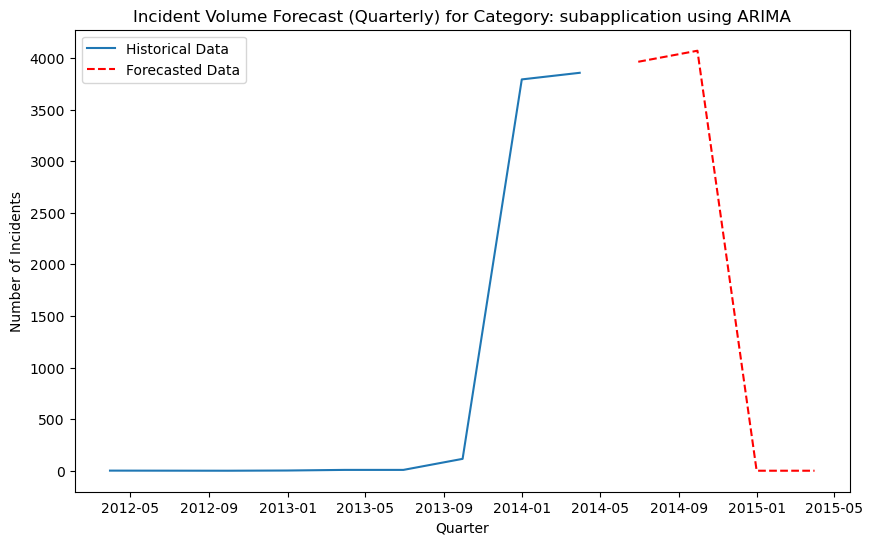

Forecasted Annual Incident Volume for Category subapplication for Next Year: 8033.0


In [178]:
forecast_dict = {}
for category in incident_quarterly_by_category.columns:
    print(f"\nForecasting for Category: {category}")
    category_series = incident_quarterly_by_category[category]
    
    category_series_diff = category_series.diff().dropna()  
    
    
    train = category_series_diff[:int(0.8 * len(category_series_diff))]
    test = category_series_diff[int(0.8 * len(category_series_diff)):] 
    
    model = ARIMA(train, order=(0, 1, 0))
    model_fit = model.fit()

    forecast_steps = 4
    forecast_diff = model_fit.forecast(steps=forecast_steps)
    
    forecast_dates = pd.date_range(start=category_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='Q')
    
    forecast_series_diff = pd.Series(forecast_diff, index=forecast_dates)
    forecast_series = forecast_series_diff.cumsum() + category_series.iloc[-1]  
    
    forecast_series = forecast_series.fillna(0)

    plt.figure(figsize=(10, 6))
    plt.plot(category_series.index, category_series, label='Historical Data')
    plt.plot(forecast_series.index, forecast_series, label='Forecasted Data', color='red', linestyle='dashed')
    plt.title(f'Incident Volume Forecast (Quarterly) for Category: {category} using ARIMA')
    plt.xlabel('Quarter')
    plt.ylabel('Number of Incidents')
    plt.legend()
    plt.show()
    
    annual_forecast = forecast_series.sum()
    print(f"Forecasted Annual Incident Volume for Category {category} for Next Year: {annual_forecast}")
    
   
    forecast_dict[category] = {
        'quarterly_forecast': forecast_series,
        'annual_forecast': annual_forecast
    }

### Forecast summaries for all categories

In [180]:
for category, forecast_data in forecast_dict.items():
    print(f"\nCategory: {category}")
    print(f"Quarterly Forecast:")
    print(forecast_data['quarterly_forecast'])
    print(f"Annual Forecast: {forecast_data['annual_forecast']}")


Category: Phone
Quarterly Forecast:
2014-06-30    1.0
2014-09-30    1.0
2014-12-31    0.0
2015-03-31    0.0
Freq: QE-DEC, Name: predicted_mean, dtype: float64
Annual Forecast: 2.0

Category: application
Quarterly Forecast:
2014-06-30    16076.0
2014-09-30    16814.0
2014-12-31        0.0
2015-03-31        0.0
Freq: QE-DEC, Name: predicted_mean, dtype: float64
Annual Forecast: 32890.0

Category: applicationcomponent
Quarterly Forecast:
2014-06-30    0.0
2014-09-30    0.0
2014-12-31    0.0
2015-03-31    0.0
Freq: QE-DEC, Name: predicted_mean, dtype: float64
Annual Forecast: 0.0

Category: computer
Quarterly Forecast:
2014-06-30    1642.0
2014-09-30    1721.0
2014-12-31       0.0
2015-03-31       0.0
Freq: QE-DEC, Name: predicted_mean, dtype: float64
Annual Forecast: 3363.0

Category: database
Quarterly Forecast:
2014-06-30    165.0
2014-09-30    169.0
2014-12-31      0.0
2015-03-31      0.0
Freq: QE-DEC, Name: predicted_mean, dtype: float64
Annual Forecast: 334.0

Category: displaydevic

### Forecast Summary and Conclusion

1. **Phone**:  
   The forecast for phones shows a minimal projected demand with an annual forecast of just 2 units, indicating low or stagnant sales for this category.
   
2. **Application**:  
   This category is expected to perform much better, with a strong annual forecast of 32,890 units, showing steady growth and demand across the quarters.
   
3. **Application Component**:  
   This category shows no predicted sales, with a forecast of 0 units, suggesting either a lack of market activity or a placeholder for future data.

4. **Computer**:  
   The computer category has moderate demand, with an annual forecast of 3,363 units, driven by consistent sales in Q2 and Q3.

5. **Database**:  
   Forecasted database demand is lower, with an annual forecast of 334 units. This suggests limited growth or a niche market for this category.

6. **Display Device**:  
   With an annual forecast of 193 units, the display device category has modest expectations. Its performance seems to be more stable in the first two quarters.

7. **Hardware**:  
   The hardware category is on track for 615 units annually, with slight growth in Q2 and Q3. However, this still represents a relatively small market.

8. **Network Components**:  
   With an annual forecast of 98 units, network components show limited growth potential for the given period.

9. **Office Electronics**:  
   This category forecasts an annual total of 128 units, indicating a relatively slow but steady performance in the market.

10. **Software**:  
    Software shows consistent growth, with a forecast of 369 units annually, though it’s still on the lower side in terms of overall market share.

11. **Storage**:  
    With an annual forecast of 754 units, the storage category seems to show strong performance and potential for further growth.

12. **Subapplication**:  
    The subapplication category is projected to see considerable demand, with an annual forecast of 8,033 units, driven by higher forecasted numbers in Q2 and Q3.

### Conclusion:

The data presents a mixed outlook across categories, with **Application**, **Subapplication**, and **Computer** showing relatively strong forecasts, while categories like **Phone**, **Application Component**, and **Network Components** show lower or stagnant demand. The **Storage** and **Software** categories, although not as high as applications, also display some growth potential. Companies in these sectors may need to tailor their strategies depending on the category-specific outlooks to maximize growth opportunities for the upcoming year.

### 3.Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced. 

For this task, the goal is to automatically tag tickets with the correct priorities and departments, which can help reduce reassignments and delays. Since the dataset consists of structured numerical and categorical features such as **Impact**, **Urgency**, **Number of Reassignments**, and **Handle Time**, this problem is more suited for machine learning models rather than NLP techniques. The primary objective is to predict **priority** and **department** based on these features, which are ordinal and categorical in nature. Machine learning models like **Decision Trees**, **Random Forest**, or **Gradient Boosting** can be employed to classify tickets effectively, as they excel in handling such structured data and predicting categorical outcomes. However, we did not receive the required data containing ticket descriptions or other text-based information, which is necessary for NLP-based tasks. As a result, we were unable to proceed with this task.

### 4.Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

In [186]:
df = pd.read_csv('rfc_data.csv', index_col=0)
df.head()

,CI_Cat,CI_Subcat,Priority,No_of_Related_Changes
0,11,57,4,0.0
1,1,57,3,0.0
2,1,10,3,0.0
3,1,57,4,0.0
4,1,57,4,0.0


In [187]:
X=df.drop(['No_of_Related_Changes'],axis=1)
y=df['No_of_Related_Changes']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=32)

In [189]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37284, 3)
(9321, 3)
(37284,)
(9321,)


In [190]:
y_train.value_counts()

No_of_Related_Changes
0.0    36827
1.0      437
2.0       18
3.0        2
Name: count, dtype: int64

In [191]:
y_test.value_counts()

No_of_Related_Changes
0.0    9218
1.0      99
2.0       3
9.0       1
Name: count, dtype: int64

In [192]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
X_train_scaled

array([[-0.55588783,  0.89341146, -0.24698742],
       [-0.55588783, -1.87076331, -0.24698742],
       [-0.55588783,  0.18766471, -0.24698742],
       ...,
       [ 1.52979811,  0.42291362, -1.62553218],
       [ 2.0512196 ,  0.18766471,  1.13155734],
       [-0.55588783,  0.18766471,  1.13155734]])

In [194]:
def my_confusion_matrix(y_test, y_hat, plt_title):
    cm=confusion_matrix(y_test, y_hat)
    print(classification_report(y_test,y_hat))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [195]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [196]:
y_hat_xgb=xgb.predict(X_test_scaled)
y_hat_xgb_train=xgb.predict(X_train_scaled)

In [197]:
print("Test Accuracy : " ,accuracy_score(y_test,y_hat_xgb))
print("Traning Accuracy : ",accuracy_score(y_train,y_hat_xgb_train))

Test Accuracy :  0.988949683510353
Traning Accuracy :  0.9877695526231091


XGBClassifier:  0.988949683510353
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9218
         1.0       0.00      0.00      0.00        99
         2.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         1

    accuracy                           0.99      9321
   macro avg       0.25      0.25      0.25      9321
weighted avg       0.98      0.99      0.98      9321



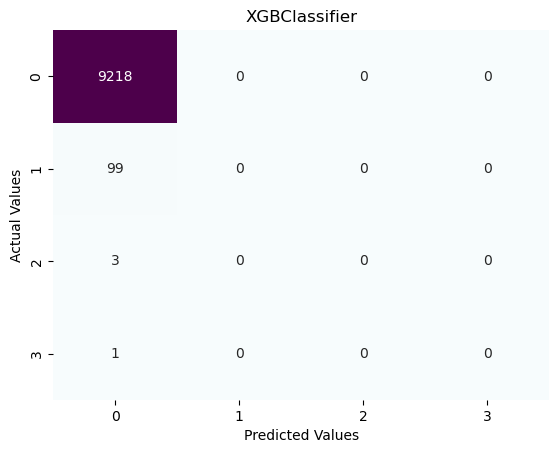

In [198]:
print('XGBClassifier: ',accuracy_score(y_test,y_hat_xgb))
cm_gbc=my_confusion_matrix(y_test, y_hat_xgb, 'XGBClassifier')

### **Conclusion**  

In this task, **XGBoost** was used to predict **Request for Change (RFC)** and possible failure or misconfiguration of **ITSM assets**. The model was evaluated based on test and training accuracy, as well as precision, recall, and F1-score.

- **XGBoost Model Performance**:  
  - **Test Accuracy**: **98.89%**  
  - **Training Accuracy**: **98.78%**  
  - **XGBClassifier Accuracy**: **98.89%**
### **Insights**  

- The **XGBoost** model achieved high **overall accuracy** (**98.89%**) but faced challenges in predicting failure, misconfiguration, and other issues due to the highly **imbalanced dataset**.
- For improving the model's ability to predict these classes, techniques like **class balancing**, **SMOTE**, and **hyperparameter tuning** are recommended.